In [38]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
train_df=pd.read_csv(r'C:\Users\asjas\BigMartTrain.csv')
test_df=pd.read_csv(r'C:\Users\asjas\BigMarttest.csv')

In [40]:
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [92]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

As we can exist there are duplicate values of Low fat and Regular type so replace all of them to one of each type.

In [42]:
train_df['Item_Fat_Content']=train_df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
train_df['Item_Fat_Content']=train_df['Item_Fat_Content'].replace(['reg'],'Regular')

In [43]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [44]:
train_df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [45]:
train_df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [46]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [47]:
test_df['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [48]:
test_df['Item_Fat_Content']=test_df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')
test_df['Item_Fat_Content']=test_df['Item_Fat_Content'].replace(['reg'],'Regular')

In [49]:
test_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [50]:
train_df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


We can observe than there are null values in Item_Weight and Outlet_Size columns in both train and test data frames

In [53]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [54]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Fill the null values of Item_Weight column, as it is a numerical column, fill it with mean

In [55]:
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(),inplace=True)
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(),inplace=True)

As there are some null values in Item_Weight column, it is a numeric column so we will replace with mean value

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Outlet_Size is categorical column so we will fill it with Mode

In [57]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

As outlet_size column is categorical and has null values, we will replace with mode

In [68]:
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0],inplace=True)
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0],inplace=True)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


As there is no purpose of Item_Identifier and Outlet_Identifier column, we will drop them

In [60]:
train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


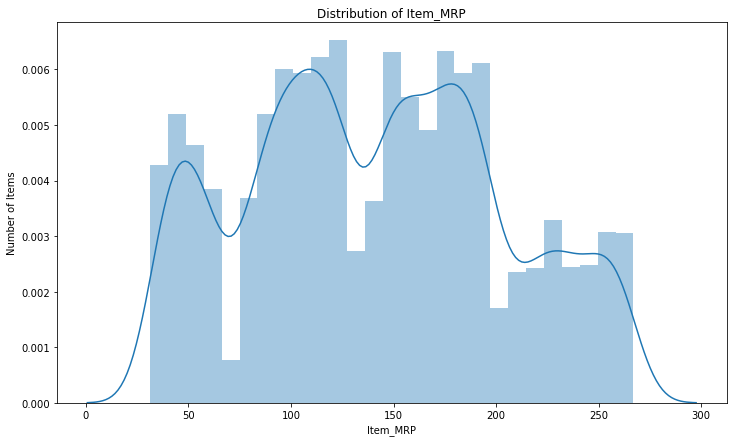

In [70]:
#Univariate distribution
plt.figure(figsize=(12,7))
sns.distplot(train_df['Item_MRP'])
plt.title('Distribution of Item_MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Number of Items')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


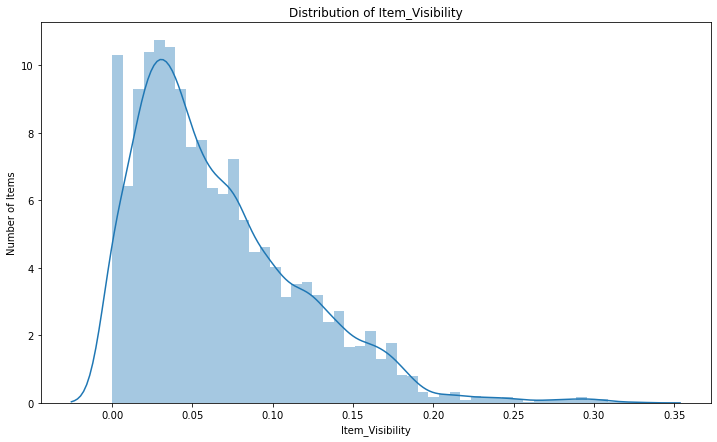

In [62]:
plt.figure(figsize=(12,7))
sns.distplot(train_df['Item_Visibility'])
plt.title('Distribution of Item_Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Number of Items')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


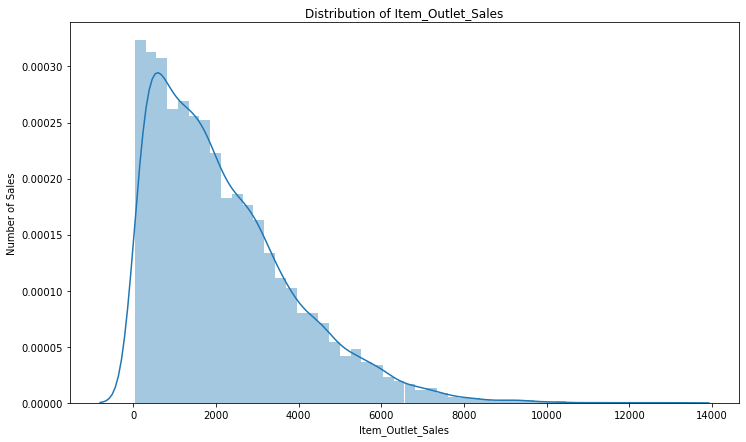

In [63]:
plt.figure(figsize=(12,7))
sns.distplot(train_df['Item_Outlet_Sales'])
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Number of Sales')
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

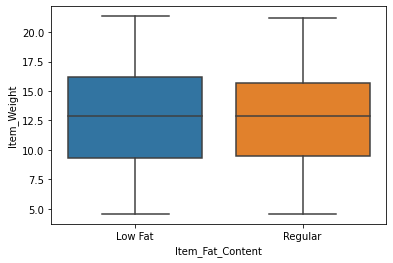

In [64]:
sns.boxplot(x='Item_Fat_Content',y='Item_Weight',data=train_df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

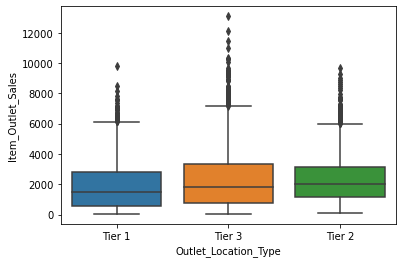

In [65]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train_df)

We can observe that Tier 3 has highest mean of Item_Outlet_Sales

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

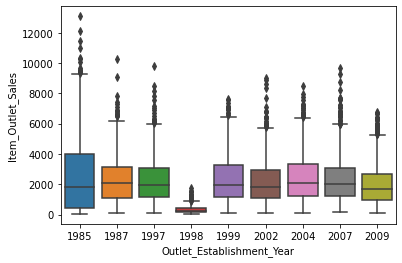

In [66]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train_df)

From the plot, we can say in the year 1985, the company had highest Item_Outlet_Sales of 12000
In the year 1998, the Outlet Sales are least

We will build the correlation matrix only for numeric columns

In [71]:
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [72]:
numeric_features.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [73]:
corr = numeric_features.corr()
print (corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


In above code, we are observing the relation between Item_Outlet_Sales and other features. We can observe that sales are highly dependent on Item_MRP and Item_Weight than any other feature

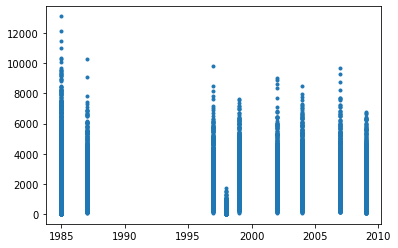

In [74]:
years=[1985,1987,1997,1998,1999,2002,2004,2007,2009]
plt.plot(train_df['Outlet_Establishment_Year'],train_df['Item_Outlet_Sales'],'.')
plt.show()

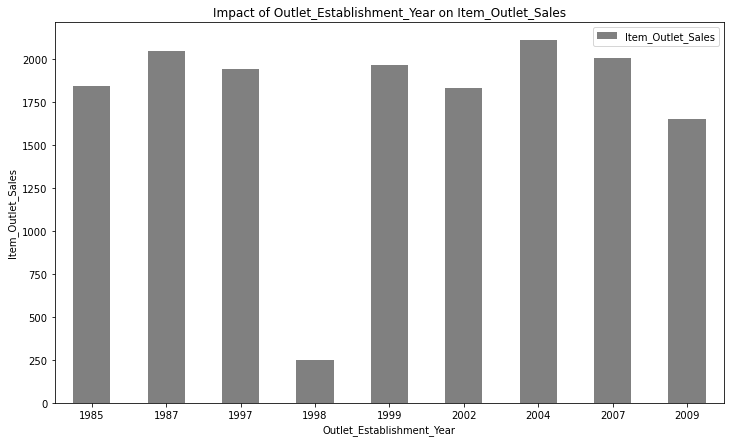

In [86]:
Outlet_Establishment_Year_pivot = \
train_df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='grey',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

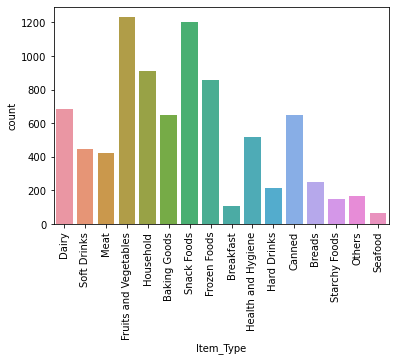

In [82]:

sns.countplot(train_df.Item_Type)
plt.xticks(rotation=90)

From above plot, we can say which type of items are highly brought in the Outlet Sales

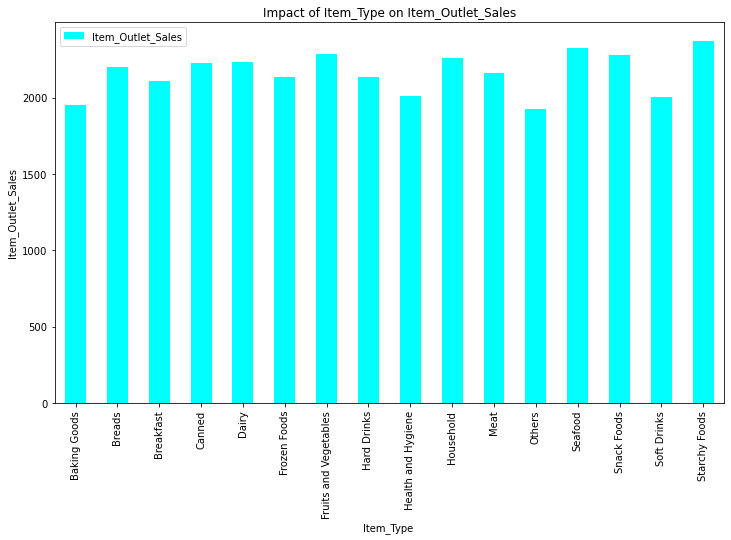

In [89]:
pivoTable = \
train_df.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='cyan',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

The above plot tells us that the highest brought Item_type doesnot necessarily increase the sales.

In [93]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [94]:
#Preprocessing for Model Building
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train_df['Item_Fat_Content']= le.fit_transform(train_df['Item_Fat_Content'])
train_df['Item_Type']= le.fit_transform(train_df['Item_Type'])
train_df['Outlet_Size']= le.fit_transform(train_df['Outlet_Size'])
train_df['Outlet_Location_Type']= le.fit_transform(train_df['Outlet_Location_Type'])
train_df['Outlet_Type']= le.fit_transform(train_df['Outlet_Type'])

In [96]:
train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [98]:
X=train_df.drop('Item_Outlet_Sales',axis=1)
Y=train_df['Item_Outlet_Sales']

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [100]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

In [102]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [103]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [104]:
Y_pred_lr=lr.predict(X_test_std)

In [105]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


0.5040717488447087
880.9630396797251
1162.577037928033


In [106]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [107]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [108]:
Y_pred_rf= rf.predict(X_test_std)


In [109]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.548762239257646
780.8650516093841
1108.9578361445474
